# Import Libraries

In [157]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy.contrasts import Sum
import warnings

In [159]:
from __future__ import division, print_function
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

## Generate dataset
* Dataset includes different smartphone key features and a conjoint analysis survey where participants choose their preferred smartphone 

In [160]:
brand = ["samusang", "Hauweii", "apple", "Gtel", "Itel"]
screen_size=["large","medium", "small"]

data = {
    'brand': np.random.choice(brand, 100),
    'screen_size': np.random.choice(screen_size, 100),
    'storage': np.random.randint(100,500,100),
    'ram_size': np.random.randint(2,8,100),
    'battery(mph)': np.random.randint(100,1000,100),
    'camera(pixels)' : np.random.randint(10,100,100),
    'price(usd)': np.random.randint(60,1000,100),
    'preference': np.random.randint(0,11, 100)
}
df = pd.DataFrame(data)

In [161]:
#Export generated data to csv
df.to_csv("dataset/smartphones.csv", index=False)

#Import saved csv file
smartphones = pd.read_csv("dataset/smartphones.csv")

## Explore and clean data

In [162]:
smartphones.head(20)

,brand,screen_size,storage,ram_size,battery(mph),camera(pixels),price(usd),preference
0,Hauweii,medium,336,3,292,98,371,0
1,Hauweii,large,285,6,652,36,863,2
2,apple,large,374,6,822,30,539,10
3,Gtel,medium,387,5,606,47,195,7
4,Itel,medium,385,2,881,70,449,7
5,Itel,small,366,6,670,94,700,0
6,Itel,medium,104,4,149,55,352,0
7,Gtel,large,475,2,808,24,919,0
8,Gtel,large,345,6,592,13,364,9
9,Hauweii,large,156,7,989,26,977,8


In [169]:
smartphones.columns

Index(['brand', 'screen_size', 'storage', 'ram_size', 'battery(mph)',
       'camera(pixels)', 'price(usd)', 'preference'],
      dtype='object')

<Axes: xlabel='preference'>

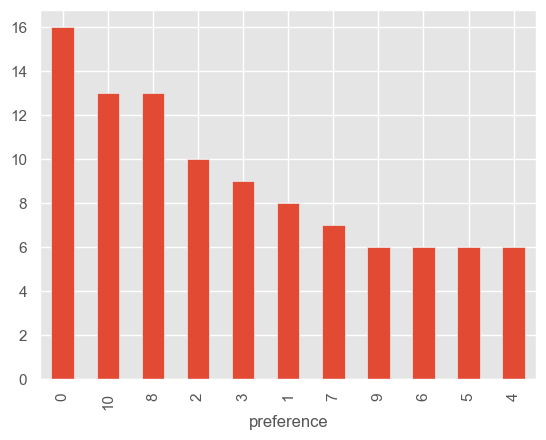

In [167]:
smartphones.preference.value_counts().plot(kind='bar')

In [170]:
smartphones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   brand           100 non-null    object
 1   screen_size     100 non-null    object
 2   storage         100 non-null    int64 
 3   ram_size        100 non-null    int64 
 4   battery(mph)    100 non-null    int64 
 5   camera(pixels)  100 non-null    int64 
 6   price(usd)      100 non-null    int64 
 7   preference      100 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 6.4+ KB


In [172]:
smartphones.isna().sum()

brand             0
screen_size       0
storage           0
ram_size          0
battery(mph)      0
camera(pixels)    0
price(usd)        0
preference        0
dtype: int64

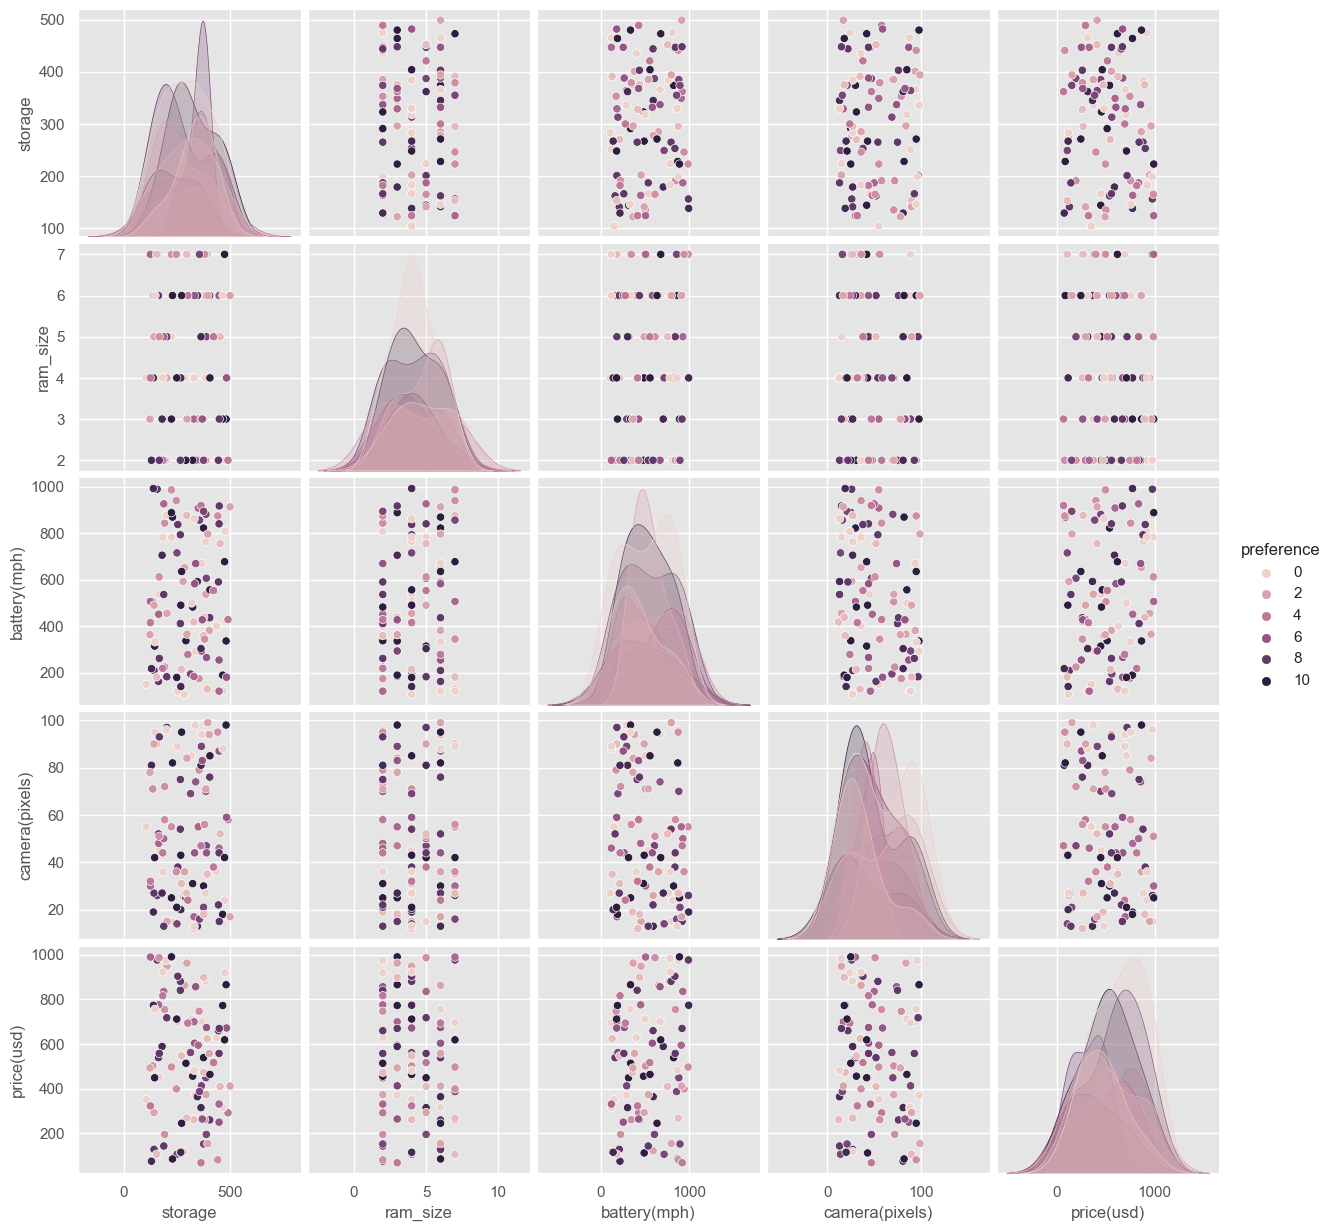

In [179]:
sns.pairplot(data=smartphones, hue="preference")

In [177]:
var = ['storage', 'ram_size', 'battery(mph)',
 'camera(pixels)', 'price(usd)', 'preference']
smartphones_corr = smartphones[var].corr()
smartphones_corr

,storage,ram_size,battery(mph),camera(pixels),price(usd),preference
storage,1.000000,-0.055854,0.056170,-0.002790,-0.098480,0.011513
ram_size,-0.055854,1.000000,0.075259,-0.003901,-0.090391,-0.067406
battery(mph),0.056170,0.075259,1.000000,-0.222653,0.135365,0.035747
camera(pixels),-0.002790,-0.003901,-0.222653,1.000000,-0.110499,-0.099120
price(usd),-0.098480,-0.090391,0.135365,-0.110499,1.000000,-0.092657
preference,0.011513,-0.067406,0.035747,-0.099120,-0.092657,1.000000


<Axes: >

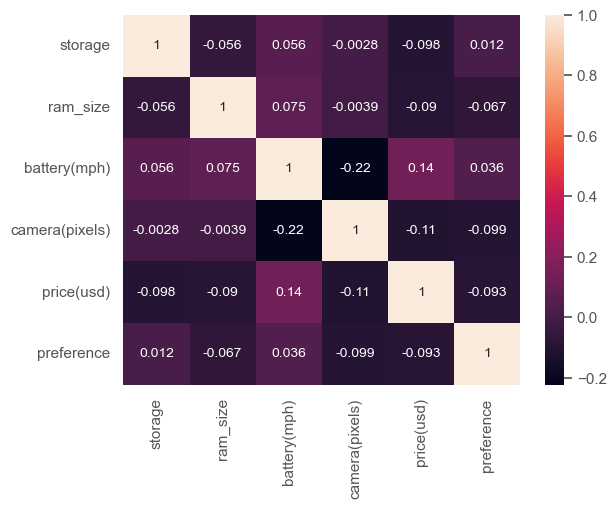

In [178]:
sns.heatmap(smartphones_corr, annot=True)